# Feature Engineering

### Feature Extraction Methods:

- **Bag of Words** `sklearn.feature_extraction.text.CountVectorizer`
- **TF-IDF**: Term Frequency; Inverse Document Frequency

### Features:
- `requirements`
- `skills`

In [1]:
from imports import *
from prepare import prep_data, basic_clean, lemmatize, remove_stopwords, split
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Getting data
df = pd.read_csv('data_science.csv')

In [3]:
# Initial cleaning
df = prep_data(df)

In [4]:
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['experience', 'ability', 'skill'])

In [5]:
def clean_skills(text):
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['year', 'experience', 'ability', 'skill', 'programming', 'language'])

In [6]:
df.requirements = df.requirements.apply(clean)

In [7]:
df.skills = df.skills.apply(clean_skills)

In [8]:
train, validate, test = split(df)
train.shape, validate.shape, test.shape

((119, 17), (52, 17), (43, 17))

***

## Bag of Words

In [10]:
cv = CountVectorizer(max_features = 100)
bag_of_words = cv.fit_transform(train.requirements)

In [11]:
bag_of_words

<119x100 sparse matrix of type '<class 'numpy.int64'>'
	with 3932 stored elements in Compressed Sparse Row format>

**Sparse Matrix**

In [13]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [14]:
cv.get_feature_names_out()

array(['10', '100', '10sql', ..., 'youre', 'youve', 'zero'], dtype=object)

In [15]:
cv.vocabulary_

{'bachelor': 195,
 'degree': 530,
 'relevant': 1646,
 'field': 798,
 'year': 2139,
 'work': 2116,
 'strong': 1895,
 'handson': 912,
 'sql': 1849,
 'data': 492,
 'management': 1188,
 'database': 493,
 'design': 555,
 'including': 976,
 'ssa': 1857,
 'ssrs': 1859,
 'power': 1489,
 'bi': 224,
 'excellent': 741,
 'problem': 1538,
 'solving': 1820,
 'communication': 365,
 'dbaedaetl': 507,
 'technical': 1959,
 'desire': 558,
 'learn': 1122,
 'new': 1316,
 'software': 1812,
 'method': 1239,
 'familiar': 784,
 'cloud': 332,
 'service': 1770,
 'offering': 1356,
 'azure': 191,
 'aws': 189,
 'healthcare': 917,
 'pharmacy': 1451,
 'managed': 1187,
 'care': 280,
 'health': 916,
 'plan': 1464,
 'hospital': 938,
 'pharmaceutical': 1450,
 'previous': 1520,
 'engineer': 689,
 'similar': 1789,
 'role': 1697,
 'numerical': 1340,
 'analytical': 101,
 'statistic': 1871,
 'statistical': 1872,
 'modeling': 1266,
 'big': 226,
 'application': 125,
 'process': 1542,
 'dashboarding': 490,
 'powerbisql': 1491,
 

In [17]:
pprint(train.requirements)
# Taking a look at the bag of words transformation for education and diagnostics.
# In practice this is not necesssary and the resulting data might be to big to be reasonably helpful.
bow = pd.DataFrame(bag_of_words.todense(), columns=cv.get_feature_names_out())

85     bachelor's degree relevant field 5 year relevant work strong handson sql data manageme...
33     bachelor's degree technical discipline computer science electrical engineering chemica...
151    b computer science quantitative field eg applied math statistic proficiency data model...
173    master's degree possessing stated degree preferred comcast also may consider applicant...
202    create report data visualization guide decisionmaking across purchasing team drive pro...
140    bachelor degree business analytics data science mathematics statistic quantitative dis...
9      5 year relevant work data modelinganalytics data management data architecture data eng...
170    good balance business acumen technical knowledge must connect dot different requiremen...
176    4 year developing machine learning solution deployed production environment 6 year sof...
206    3 year data analyst sql script snowflake tableaubi tool python preferred aws familiari...
40     5 year professional sof

In [18]:
bow

,10,100,10sql,12,1st,1year,2023,2024,23,25,...,xml,yahoo,yammer,yarn,year,yearspython,youll,youre,youve,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
bow.apply(lambda row: row / row.sum(), axis=1)

,10,100,10sql,12,1st,1year,2023,2024,23,25,...,xml,yahoo,yammer,yarn,year,yearspython,youll,youre,youve,zero
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004975,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.008850,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.007299,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.022472,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000


## TF-IDF

In [9]:
tfidf = TfidfVectorizer()
bag_of_words = tfidf.fit_transform(train.requirements)
pd.DataFrame(bag_of_words.todense(), columns=tfidf.get_feature_names_out())

,10,100,10sql,12,1st,1year,2023,2024,23,25,...,xml,yahoo,yammer,yarn,year,yearspython,youll,youre,youve,zero
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.043838,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.119235,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.260086,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.075849,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.029824,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.030011,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.075418,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.048174,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
pprint(train.requirements)
pd.Series(dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))).sort_values()

85     bachelor's degree relevant field 5 year relevant work strong handson sql data manageme...
33     bachelor's degree technical discipline computer science electrical engineering chemica...
151    b computer science quantitative field eg applied math statistic proficiency data model...
173    master's degree possessing stated degree preferred comcast also may consider applicant...
202    create report data visualization guide decisionmaking across purchasing team drive pro...
140    bachelor degree business analytics data science mathematics statistic quantitative dis...
9      5 year relevant work data modelinganalytics data management data architecture data eng...
170    good balance business acumen technical knowledge must connect dot different requiremen...
176    4 year developing machine learning solution deployed production environment 6 year sof...
206    3 year data analyst sql script snowflake tableaubi tool python preferred aws familiari...
40     5 year professional sof

data            1.042560
science         1.244197
year            1.254892
python          1.265703
language        1.265703
                  ...   
hundred         5.094345
humanity        5.094345
humancentric    5.094345
huge            5.094345
zero            5.094345
Length: 2145, dtype: float64

## Bag of Ngrams

Setting `ngram_range` parameter for `CountVectorizer` and `TfidVectorizer`

In [14]:
cv = CountVectorizer(ngram_range=(2, 2))
bag_of_words = cv.fit_transform(train.requirements)

pprint(train.requirements)

85     bachelor's degree relevant field 5 year relevant work strong handson sql data manageme...
33     bachelor's degree technical discipline computer science electrical engineering chemica...
151    b computer science quantitative field eg applied math statistic proficiency data model...
173    master's degree possessing stated degree preferred comcast also may consider applicant...
202    create report data visualization guide decisionmaking across purchasing team drive pro...
140    bachelor degree business analytics data science mathematics statistic quantitative dis...
9      5 year relevant work data modelinganalytics data management data architecture data eng...
170    good balance business acumen technical knowledge must connect dot different requiremen...
176    4 year developing machine learning solution deployed production environment 6 year sof...
206    3 year data analyst sql script snowflake tableaubi tool python preferred aws familiari...
40     5 year professional sof

In [15]:
pd.DataFrame(bag_of_words.todense(), columns=cv.get_feature_names_out())

,10 year,100 million,10sql statistical,12 year,1st 3rd,1year data,2023 august,2024 knowledge,23 year,25 year,...,year using,year work,year working,year wrangling,year year,yearspython programming,youll bring,youre compelling,youve created,zero four
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***

## Modeling

- Converting `description` and `skills` to dataframe
- Splitting train, validate, test into x and y

#### Train (Bags of words)

In [69]:
cvr = CountVectorizer(max_features = 10, ngram_range=(2, 2))
r_words_train = cvr.fit_transform(train.requirements)
r = pd.DataFrame(r_words_train.todense(), columns=cvr.get_feature_names_out())

In [70]:
cvs = CountVectorizer(max_features = 5, ngram_range=(2, 2))
s_words_train = cvs.fit_transform(train.skills)
s = pd.DataFrame(s_words_train.todense(), columns=cvs.get_feature_names_out())

In [71]:
r_and_s = pd.concat([r,s], axis =1)

In [72]:
cols = ['associate', 'entry', 'analyst', 'engineer','scientist']
newdf = pd.DataFrame(train[cols])
newdf

,associate,entry,analyst,engineer,scientist
85,0,1,0,1,0
33,0,1,0,1,0
151,0,0,0,1,0
173,0,1,0,0,1
202,0,1,1,0,0
140,0,1,1,0,0
9,0,1,0,1,0
170,0,1,1,0,0
176,0,1,0,0,1
206,1,0,1,0,0


In [73]:
r_and_s = r_and_s.set_index(newdf.index)

In [74]:
X_train_a = pd.concat([r_and_s,newdf], axis =1)

In [75]:
X_train_a.shape

(119, 20)

***

#### Train (TF-IDF)

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 10, ngram_range=(2, 2))
r_words_train = tfidf.fit_transform(train.requirements)
r = pd.DataFrame(r_words_train.todense(), columns=tfidf.get_feature_names_out())

In [86]:
cols = ['associate', 'entry', 'analyst', 'engineer','scientist']
newdf = pd.DataFrame(train[cols])

In [87]:
r = r.set_index(newdf.index)

In [88]:
X_train_b=pd.concat([r,newdf], axis =1)

In [89]:
X_train_b.shape

(119, 15)

***

#### Validate (Bags of Words)

In [76]:
r_words_validate = cvr.transform(validate.requirements)
r = pd.DataFrame(r_words_validate.todense(), columns=cvr.get_feature_names_out())

In [77]:
s_words_validate = cvs.transform(validate.skills)
s = pd.DataFrame(s_words_validate.todense(), columns=cvs.get_feature_names_out())

In [78]:
r_and_s = pd.concat([r,s], axis =1)
r_and_s.shape

(52, 15)

In [79]:
cols = ['associate', 'entry', 'analyst', 'engineer','scientist']
newdf = pd.DataFrame(validate[cols])

In [80]:
r_and_s = r_and_s.set_index(newdf.index)

In [81]:
X_validate_a = pd.concat([r_and_s,newdf], axis =1)

#### Validate (TF-IDF)

In [90]:
r_words_validate = tfidf.transform(validate.requirements)
r = pd.DataFrame(r_words_validate.todense(), columns=tfidf.get_feature_names_out())

In [91]:
cols = ['associate', 'entry', 'analyst', 'engineer','scientist']
newdf = pd.DataFrame(validate[cols])

In [92]:
r = r.set_index(newdf.index)

In [93]:
X_validate_b=pd.concat([r,newdf], axis =1)

#### Test (Bags of Words)

In [82]:
r_words_test = cvr.transform(test.requirements)
r = pd.DataFrame(r_words_test.todense(), columns=cvr.get_feature_names_out())

In [83]:
s_words_test = cvs.transform(test.skills)
s = pd.DataFrame(s_words_test.todense(), columns=cvs.get_feature_names_out())

In [84]:
r_and_s = pd.concat([r,s], axis =1)
cols = ['associate', 'entry', 'analyst', 'engineer','scientist']
newdf = pd.DataFrame(test[cols])
r_and_s = r_and_s.set_index(newdf.index)
X_test_a = pd.concat([r_and_s,newdf], axis =1)

#### Test (TF-IDF)

In [94]:
r_words_test = tfidf.transform(test.requirements)
r = pd.DataFrame(r_words_test.todense(), columns=tfidf.get_feature_names_out())

In [95]:
cols = ['associate', 'entry', 'analyst', 'engineer','scientist']
newdf = pd.DataFrame(test[cols])

In [96]:
r = r.set_index(newdf.index)

In [97]:
X_test_b=pd.concat([r,newdf], axis =1)

#### Target

In [37]:
y_train = train.label
y_validate = validate.label
y_test = test.label

### Baseline

In [37]:
train.label.mode()

0    h
Name: label, dtype: object

In [34]:
train['baseline_pred'] = 'h'

In [38]:
baseline_accuracy = (train.label == train.baseline_pred).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 91.60%


### Decision Tree (bag of words, bigram)

In [38]:
# import classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [98]:
X_train_a.head()

,bachelor degree,computer science,data analysis,data analytics,data science,data visualization,machine learning,programming language,python programming,related field,data analysis,machine learning,microsoft excel,microsoft powerpoint,sql python,associate,entry,analyst,engineer,scientist
85,1,0,0,0,0,0,0,2,1,0,0,0,1,1,1,0,1,0,1,0
33,1,2,0,2,1,0,3,2,1,0,0,1,1,0,1,0,1,0,1,0
151,0,1,0,0,0,0,1,2,1,0,0,1,0,0,1,0,0,0,1,0
173,0,0,0,1,0,0,1,2,0,0,0,1,0,0,0,0,1,0,0,1
202,0,0,0,0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,0


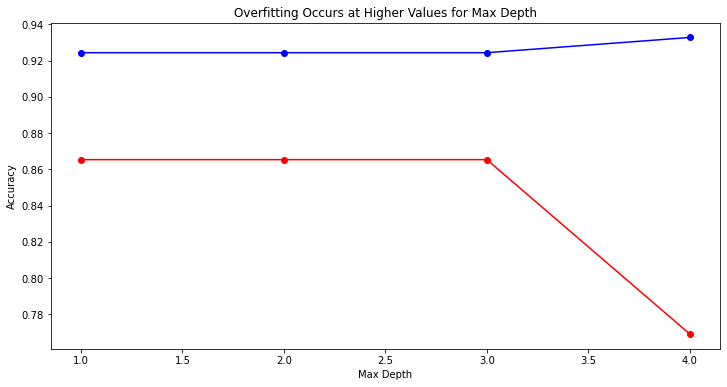

In [99]:
# max depth vs. model score, comparing training & validate datasets
metrics = []

for i in range(1, 5):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_a, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train_a, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate_a, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.sort_values(by = ['validate_accuracy', 'difference'], ascending = [False, True])

# Visualizing model performance as we change the max depth, check if there's overfitting
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', color = 'blue')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', color = 'red')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [116]:
# Create the tree
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model on train
tree = tree.fit(X_train_a, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree.predict(X_train_a)

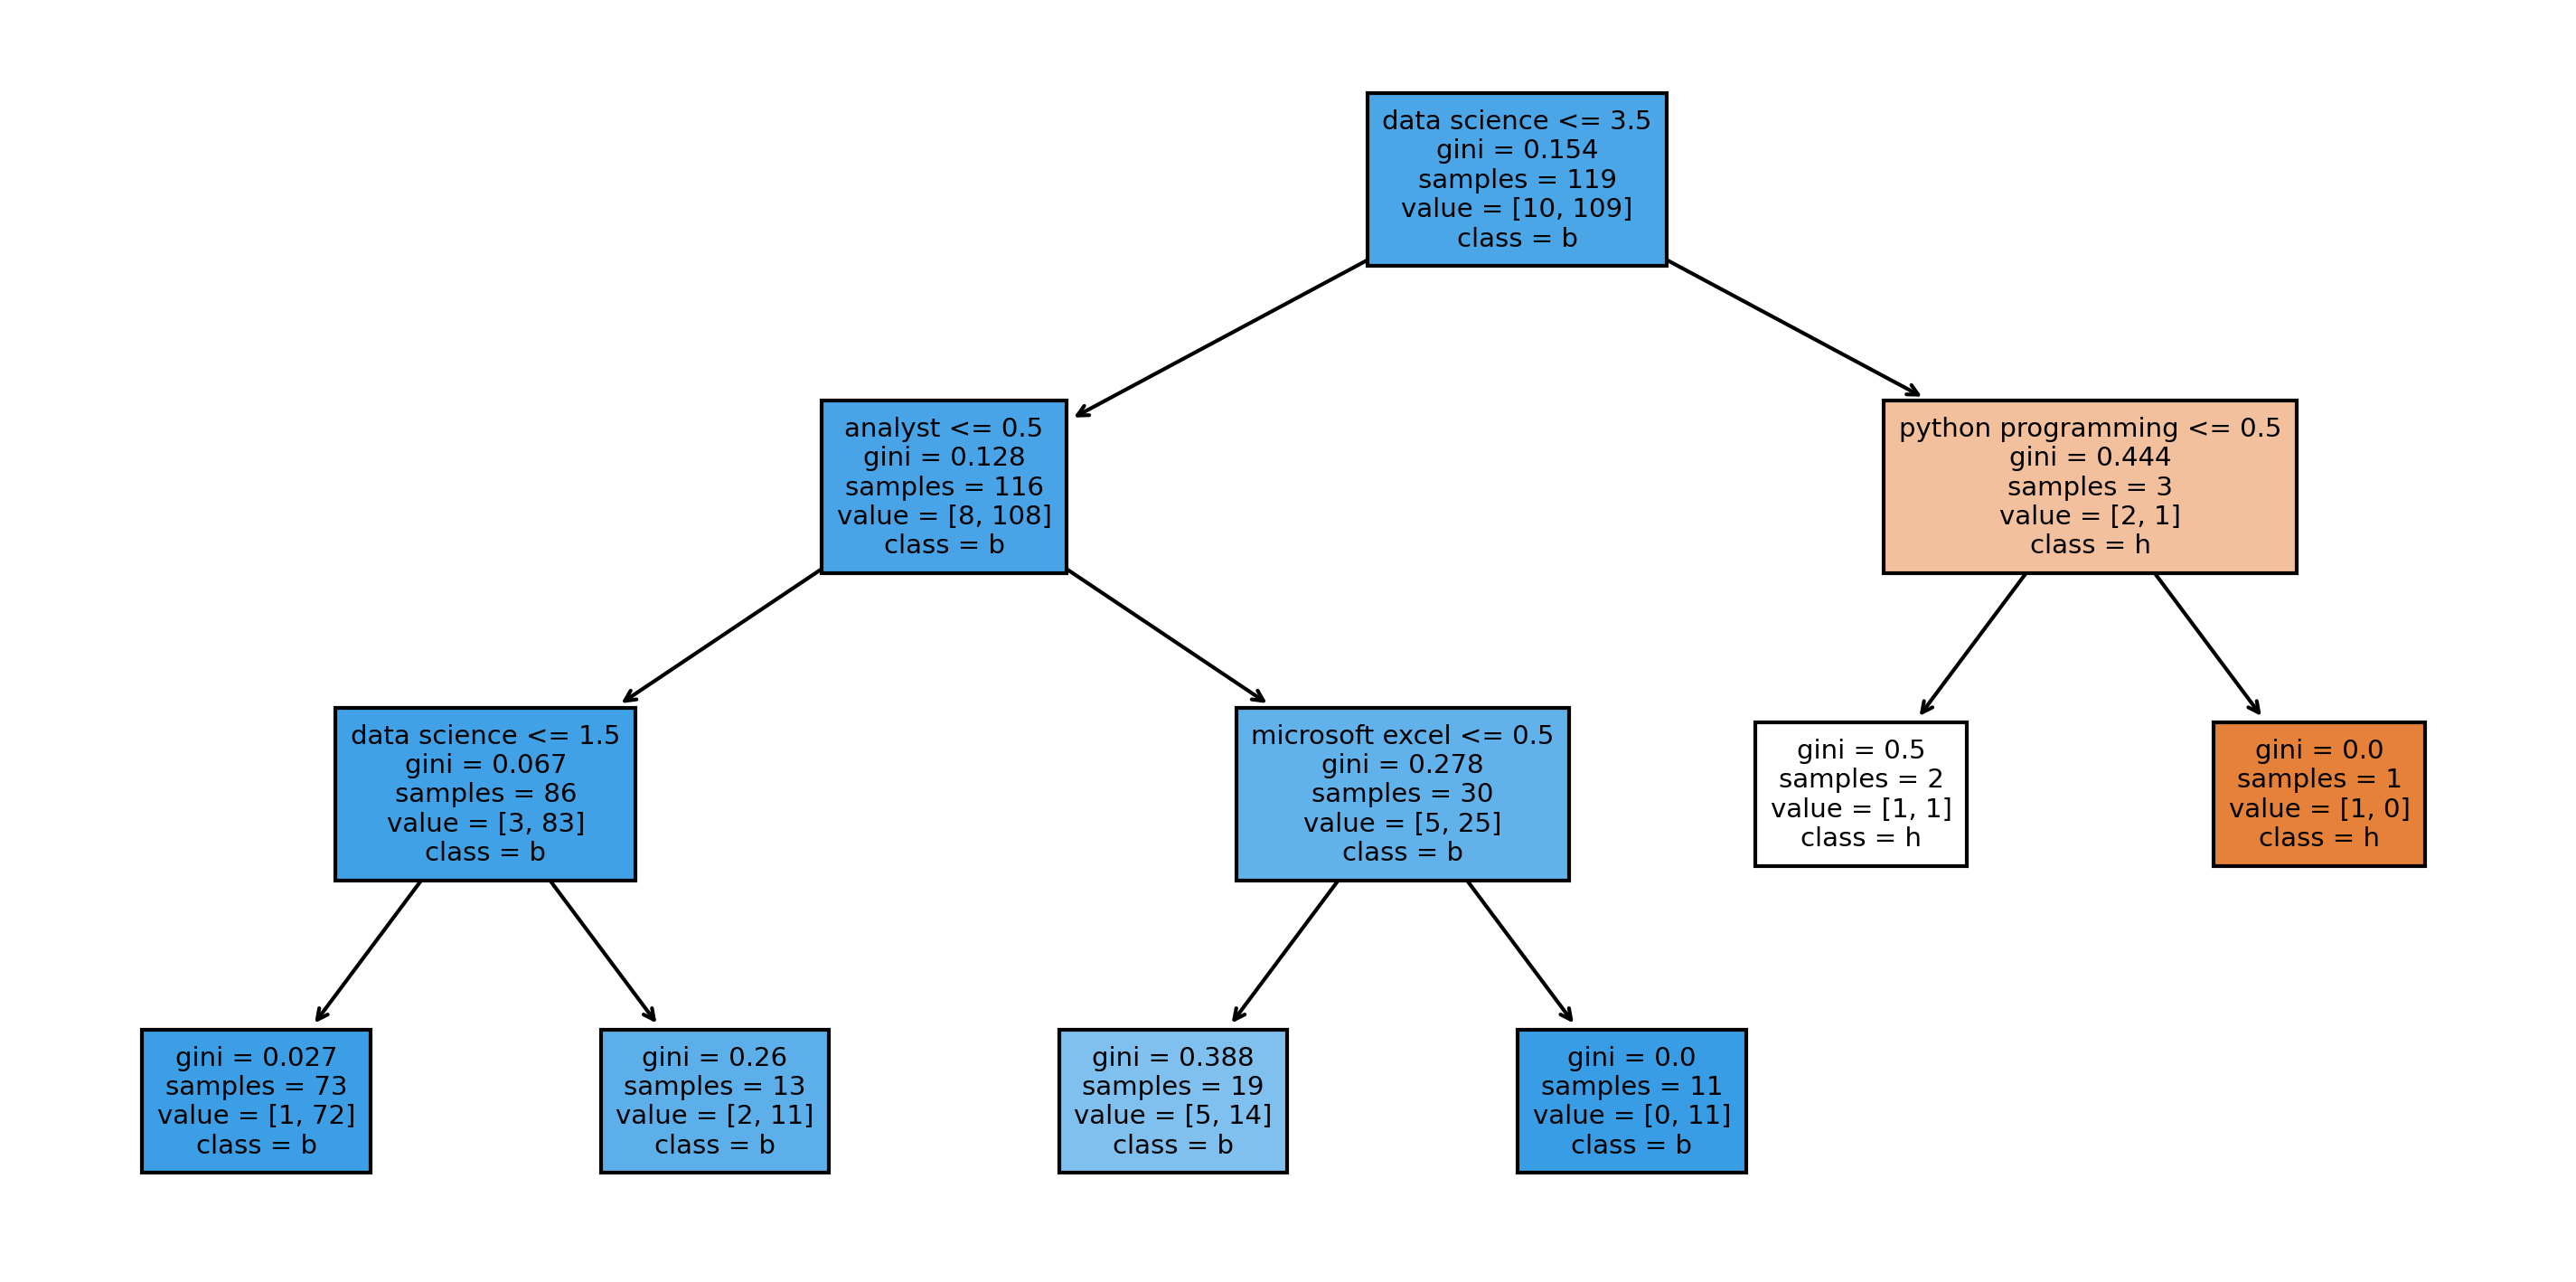

In [117]:
# Visualizing the tree
fig, ax = plt.subplots(figsize=(12,6), dpi = 300)
plot_tree(tree, feature_names=X_train_a.columns, class_names=y_train.unique(), filled=True, fontsize=7)
plt.show()

In [118]:
print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(tree.score(X_train_a, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(tree.score(X_validate_a, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.924
Accuracy of Decision Tree classifier on validate set: 0.865


###  Decision Tree (TF-IDF)

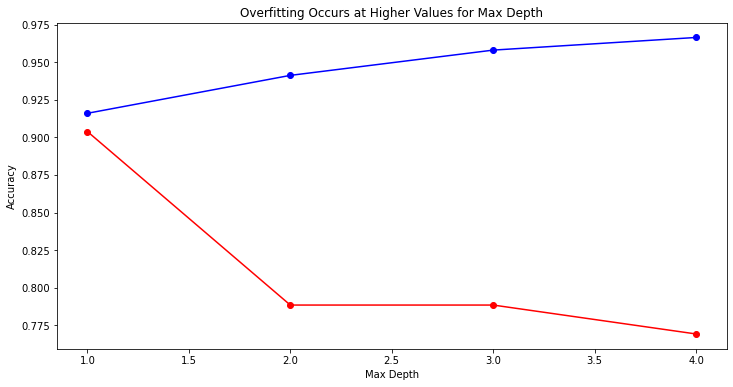

In [103]:
# max depth vs. model score, comparing training & validate datasets
metrics = []

for i in range(1, 5):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_b, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train_b, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate_b, y_validate)

    output = {
        "max_depth": i,
        "train_b_accuracy": in_sample_accuracy,
        "validate_b_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_b_accuracy - df.validate_b_accuracy
df.sort_values(by = ['validate_b_accuracy', 'difference'], ascending = [False, True])

# Visualizing model performance as we change the max depth, check if there's overfitting
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_b_accuracy, marker = 'o', color = 'blue')
plt.plot(df.max_depth, df.validate_b_accuracy, marker = 'o', color = 'red')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [104]:
# Create the tree
tree2 = DecisionTreeClassifier(max_depth=1, random_state=123)

# Fit the model on train
tree2 = tree2.fit(X_train_b, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree2.predict(X_train_b)

In [105]:
print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(tree2.score(X_train_b, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(tree2.score(X_validate_b, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.916
Accuracy of Decision Tree classifier on validate set: 0.904


### Random Forest (bag of word, bigram)

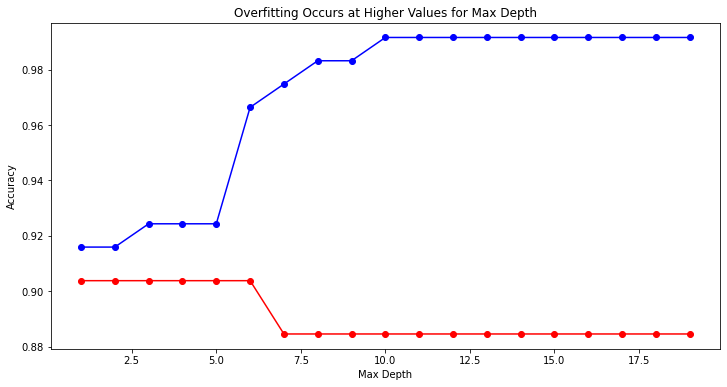

In [107]:
# loop through max_depth, compare train vs. validate performance
metrics = []

for i in range(1, 20):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train_a, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train_a, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate_a, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.sort_values(by = ['validate_accuracy', 'difference'], ascending = [False, True])

# Visualizing model performance, check if there's overfitting

plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', color = 'blue')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', color = 'red')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [110]:
# Make the model
forest1 = RandomForestClassifier(max_depth=2, random_state=123)

# Fit the model on train
forest1.fit(X_train_a, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_pred = forest1.predict(X_train_a)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of depth 2")
pd.DataFrame(report)

Tree of depth 2


,b,h,accuracy,macro avg,weighted avg
precision,0.0,0.915966,0.915966,0.457983,0.838994
recall,0.0,1.000000,0.915966,0.500000,0.915966
f1-score,0.0,0.956140,0.915966,0.478070,0.875792
support,10.0,109.000000,0.915966,119.000000,119.000000


### Random Forest (TF-IDF)

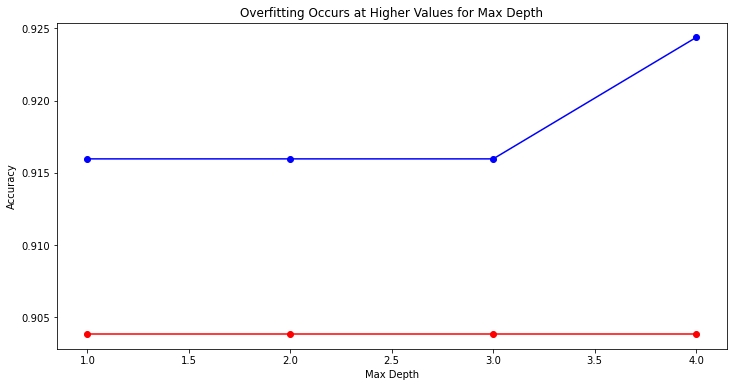

In [111]:
# loop through max_depth, compare train vs. validate performance
metrics = []

for i in range(1, 5):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train_b, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train_b, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate_b, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.sort_values(by = ['validate_accuracy', 'difference'], ascending = [False, True])

# Visualizing model performance, check if there's overfitting

plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', color = 'blue')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', color = 'red')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [112]:
# Make the model
forest3 = RandomForestClassifier(max_depth=3, random_state=123)

# Fit the model on train
forest3.fit(X_train_b, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_pred = forest3.predict(X_train_b)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of depth 3")
pd.DataFrame(report)

Tree of depth 3


,b,h,accuracy,macro avg,weighted avg
precision,0.0,0.915966,0.915966,0.457983,0.838994
recall,0.0,1.000000,0.915966,0.500000,0.915966
f1-score,0.0,0.956140,0.915966,0.478070,0.875792
support,10.0,109.000000,0.915966,119.000000,119.000000


### Logistic Regression (bags of words)

In [113]:
# Make the model
logit1 = LogisticRegression(random_state = 123, C = 0.01)

# Fit the model on train
logit1.fit(X_train_a, y_train)

# Use the model
y_pred = logit1.predict(X_train_a)

# Print accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train_a, y_train)))

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Logistic Regression Classifier, C = 0.01")
pd.DataFrame(report)

Accuracy of Logistic Regression classifier on training set: 0.92
Logistic Regression Classifier, C = 0.01


,b,h,accuracy,macro avg,weighted avg
precision,0.0,0.915966,0.915966,0.457983,0.838994
recall,0.0,1.000000,0.915966,0.500000,0.915966
f1-score,0.0,0.956140,0.915966,0.478070,0.875792
support,10.0,109.000000,0.915966,119.000000,119.000000


### Logistic Regression (TF-IDF)

In [114]:
# Make the model
logit2 = LogisticRegression(random_state = 123, C = 0.01)

# Fit the model on train
logit2.fit(X_train_b, y_train)

# Use the model
y_pred = logit2.predict(X_train_b)

# Print accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train_b, y_train)))

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Logistic Regression Classifier, C = 0.01")
pd.DataFrame(report)

Accuracy of Logistic Regression classifier on training set: 0.92
Logistic Regression Classifier, C = 0.01


,b,h,accuracy,macro avg,weighted avg
precision,0.0,0.915966,0.915966,0.457983,0.838994
recall,0.0,1.000000,0.915966,0.500000,0.915966
f1-score,0.0,0.956140,0.915966,0.478070,0.875792
support,10.0,109.000000,0.915966,119.000000,119.000000


### XGBoost

In [125]:
from xgboost import XGBClassifier
def xg_model(x_train, y_train, x_validate, y_validate):

    # fit model no training data
    model = XGBClassifier()
    
    model.fit(x_train, y_train)

    y_pred = model.predict(x_train)

    y_v_pred = model.predict(x_validate)

 
    print(classification_report(y_train, y_pred))

    print(classification_report(y_validate, y_v_pred))

In [127]:
new_y_train = y_train.map({'b': 0, 'h': 1})

In [128]:
new_y_validate = y_validate.map({'b': 0, 'h': 1})

In [129]:
new_y_test = y_test.map({'b': 0, 'h': 1})

In [130]:
xg_model(X_train_a, new_y_train, X_validate_a, new_y_validate)

ValueError: feature_names must be unique